# Rendu Projet Econométrie

Hamza AMRI

Gaël SAVOURE

# Partie 1 - Régression

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

### Modèles statistiques
from scipy import stats
from scipy.stats import f
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats import diagnostic 
from statsmodels.formula.api import ols
from statsmodels.discrete.discrete_model import Probit
from scipy.stats.distributions import chi2

#%matplotlib inline
warnings.simplefilter('ignore')

In [2]:

names = ['inlf',                    # =1 if in labor force, 1975
        'hours',                    #hours worked, 1975
        'kidslt6',                  # kids < 6 years
        'kidsgt6',                  # kids 6-18
        'age',                      #woman's age in yrs
        'educ',                     #years of schooling
        'wage',                     #estimated wage from earns., hours
        'repwage',                  #reported wage at interview in 1976
        'hushrs',                   #hours worked by husband, 1975
        'husage',                   #husband's age
        'huseduc',                  #husband's years of schooling
        'huswage',                  #husband's hourly wage, 1975
        'faminc',                   #family income, 1975
        'mtr',                      #fed. marginal tax rate facing woman
        'motheduc',                 #mother's years of schooling
        'fatheduc',                 #father's years of schooling
        'unem',                     #unem. rate in county of resid.
        'city',                     #=1 if live in SMSA
        'exper',                    #actual labor mkt exper
        'nwifeinc',                 #(faminc - wage*hours)/1000
        'lwage',                    #log(wage)
        'expersq']                  #exper^2

df_full = pd.read_csv('MROZ.raw', sep='\s+', names=names)
float_cols = ['wage', 'huswage', 'lwage']

for i in float_cols:
    df_full[i] = [0. if w=='.' else float(w) for w in df_full[i]]

## Question 1 
Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage
est strictement positive

In [3]:
# Only positive wage
df_filt = df_full[df_full.wage > 0.]
print('On dispose de ', df_filt.shape[0], ' observations.')
df_filt.head()

On dispose de  428  observations.


,inlf,hours,kidslt6,kidsgt6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


## Question 2 
Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des
femmes puis, pour les femmes dont le salaire du mari est supérieure au 65ème percentile de
l’échantillon, puis pour les femmes dont le salaire du mari est inférieur au 65ème percentile de
l’échantillon. Commenter


In [4]:
df_filt[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [5]:
per_huswage = df_filt.huswage.quantile(0.65)
df_huswage_gt_per = df_filt[df_filt['huswage'] > per_huswage]

In [6]:
# femmes dont le mari gagne plus de 65%
df_huswage_gt_per[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


In [7]:
# femmes dont le mari gagne moins de 65%
df_huswage_lt_per = df_filt[df_filt['huswage'] < per_huswage]

In [8]:
df_huswage_lt_per[['wage', 'age', 'educ']].describe()

,wage,age,educ
count,276.000000,276.000000,276.000000
mean,3.653995,41.583333,12.221014
std,2.471311,7.910656,2.126472
min,0.128200,30.000000,6.000000
25%,2.139100,35.000000,12.000000
50%,3.169700,41.000000,12.000000
75%,4.508775,47.000000,12.250000
max,22.500000,60.000000,17.000000


###  Commentaire :
- Le salaire moyen des femmes dont la mari gagne moins que 65% percentile est de 3.46. On voit que les femmes dont le mari gagne plus que 65% percentile gagnent en moyenne 5.13 > 3.46 .
- Par ailleurs, l'écart-type est plus élevé pour les femmes dont le mari gagne plus que 65% percentile.

###  Représentations graphiques :

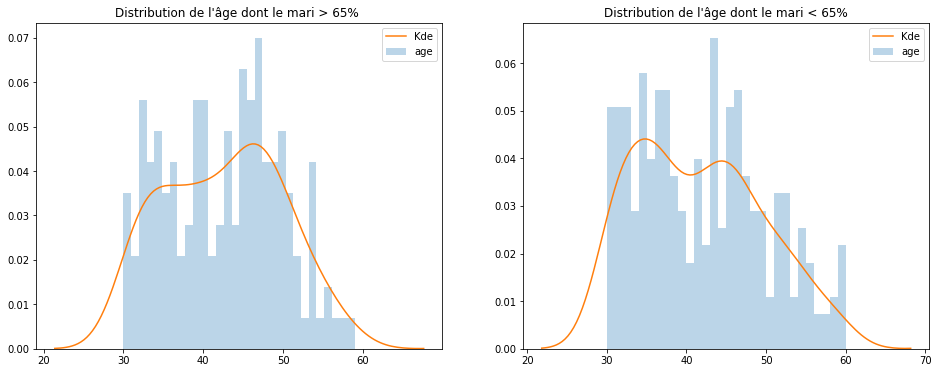

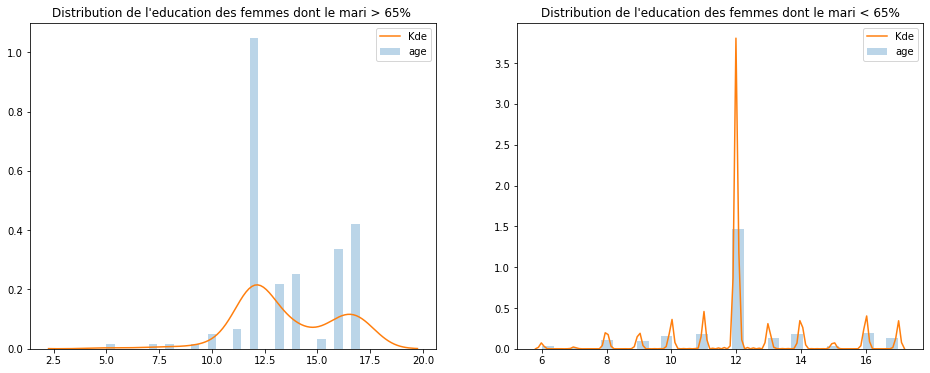

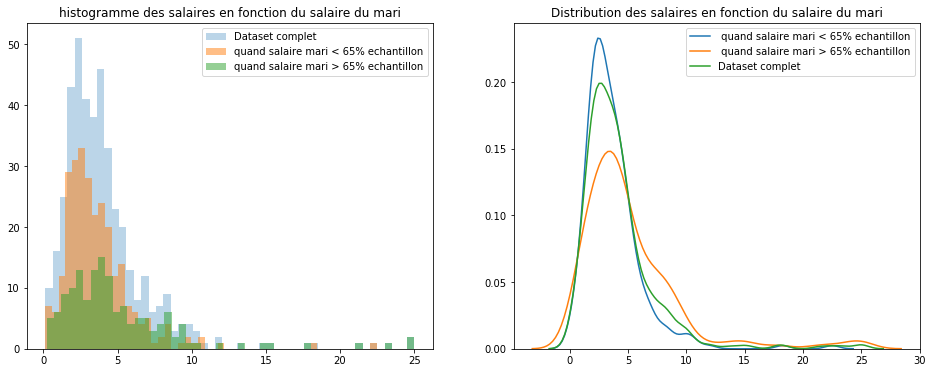

In [9]:

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
ax.hist(df_huswage_gt_per['age'], normed=True, bins=30,alpha=0.3, label='age')
sns.kdeplot(df_huswage_gt_per['age'], label="Kde")
plt.title("Distribution de l'âge dont le mari > 65% ")
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.hist(df_huswage_lt_per['age'], normed=True, bins=30,alpha=0.3, label='age')
sns.kdeplot(df_huswage_lt_per['age'], label="Kde")
plt.title("Distribution de l'âge dont le mari < 65%")
plt.legend()
plt.show()

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
ax.hist(df_huswage_gt_per['educ'], normed=True, bins=30,alpha=0.3, label='age')
sns.kdeplot(df_huswage_gt_per['educ'], label="Kde")
plt.title("Distribution de l'education des femmes dont le mari > 65% ")
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.hist(df_huswage_lt_per['educ'], normed=True, bins=30,alpha=0.3, label='age')
sns.kdeplot(df_huswage_lt_per['educ'], label="Kde")
plt.title("Distribution de l'education des femmes dont le mari < 65%")
plt.legend()
plt.show()

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
ax.hist(df_filt['wage'], label='Dataset complet', alpha=0.3,  bins=50)
ax.hist(df_huswage_lt_per['wage'], label='quand salaire mari < 65% echantillon', alpha=0.5, bins=50)
ax.hist(df_huswage_gt_per['wage'], label='quand salaire mari > 65% echantillon', alpha=0.5,  bins=50)
plt.legend()
plt.title("histogramme des salaires en fonction du salaire du mari")

ax = fig.add_subplot(1, 2, 2)
sns.kdeplot(df_huswage_lt_per['wage'], label=' quand salaire mari < 65% echantillon')
sns.kdeplot(df_huswage_gt_per['wage'], label=' quand salaire mari > 65% echantillon')
sns.kdeplot(df_filt['wage'], label='Dataset complet')
plt.legend()
plt.title("Distribution des salaires en fonction du salaire du mari")
plt.show()

## Question 3 :
Faire l'histogramme de la variable wage. Supprimer les observations qui sont à plus de 3
écart-types de la moyenne et refaire l’histogramme

In [10]:
a = 3*df_filt.wage.std()
b= df_filt.wage.mean()
df_filt2 = df_filt[abs(df_filt-b)<a]
a,b

(9.930847162513057, 4.177681542056075)

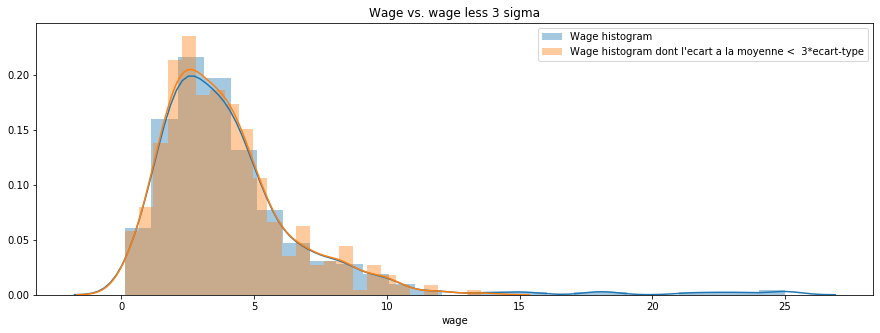

In [11]:

plt.figure(figsize=(15, 5))
plt.title("Wage vs. wage less 3 sigma")
sns.distplot(df_filt.wage, bins=25, label="Wage histogram")
sns.distplot(df_filt2.wage, bins=25, label="Wage histogram dont l'ecart a la moyenne <  3*ecart-type")
plt.legend()
plt.show()

#### Commentaire :  
On constate une très légère différence en applicant la contrainte   <   $3*\sigma{}$

## Question 4

 Calculer les corrélations motheduc et fatheduc. Expliquer le problème de multi-collinéarité. Commenter.

In [12]:
pearsonr(df_filt.motheduc,df_filt.fatheduc)

(0.5540632184311678, 8.302344435820026e-36)

In [13]:
print('Corrélation motheduc vs fatheduc: ', np.round(pearsonr(df_filt.motheduc,df_filt.fatheduc)[0], 3))
print('p-value pour H0 pas de corrélation : ', np.round(pearsonr(df_filt.motheduc,df_filt.fatheduc)[1], 3))


Corrélation motheduc vs fatheduc:  0.554
p-value pour H0 pas de corrélation :  0.0


Problème de multicolinéarité : lorsqu'il y a colinéarité entre les variables explicatives, le test de Student n'est pas utile pour évaluer la significativité d'un modèle => il faut utiliser la statistique de Fisher qui évalue une significativé globale.

## Question 5 : education , wage 
Faites un graphique en nuage de point entre wage et educ. S'agit-il d'un effet "toute chose
étant égale par ailleurs ?"

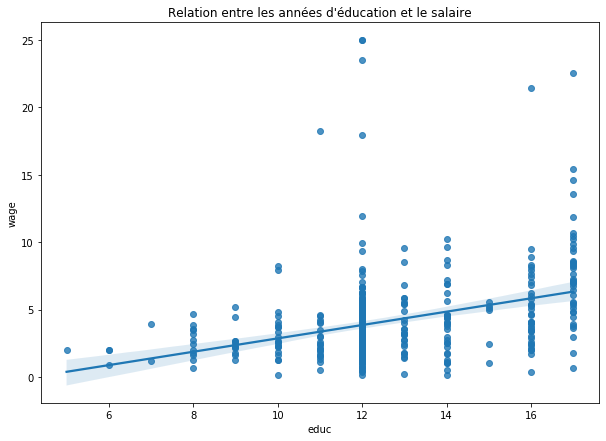

In [14]:

plt.figure(figsize=(10, 7))
plt.title("Relation entre les années d'éducation et le salaire")
#plt.plot(df_filt.educ, df_filt.wage,'o')
sns.regplot(df_filt.educ, df_filt.wage, fit_reg=True)
plt.show()

#### Commentaire :
- Il ne s'agit pas d'un effet "toute chose étant égale par ailleurs", car pour chaque donnée le reste des variables ne sont pas constantes.
- D'après la regression linéaire, les années d'éducation supplémentaires semblent augmenter significativement le salaire. Nous contrôlerons ceci juste après. On a aussi un problème variance qui peu induire de l'héteroscedacticité.

## Question 6

Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise.

- L'hypothèse de normalité des résidus garantit l'obtention du meilleur estimateur linéaire non-biaisé (BLUE). Ainsi, les résidus sont centrés en zéro, de variance constante à travers le temps (iid). On parle alors d'homoscedasticité.

- Une variable omise viole l'hypothèse de normalité des résidus, car l'effet des variables omises à des conséquences sur les résidus.

## Question 7
Faire la régression du log de wage en utilisant comme variables explicatives une constante,
city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

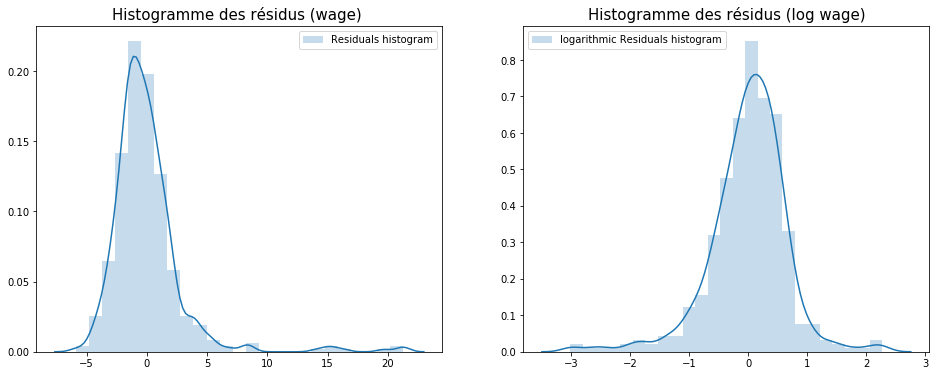

In [15]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsgt6']
X = df_filt[cols]
model = sm.OLS(df_filt.wage, sm.add_constant(X)).fit()
residuals = model.resid

model1 = sm.OLS(df_filt.lwage, sm.add_constant(X)).fit()
lresiduals = model1.resid

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.title("Histogramme des résidus (wage) ", fontsize=15)
sns.distplot(residuals, bins=25, label='Residuals histogram', hist_kws=dict(alpha=0.25))
plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Histogramme des résidus (log wage)", fontsize=15)
sns.distplot(lresiduals, bins=25, label='logarithmic Residuals histogram', hist_kws=dict(alpha=0.25))
plt.legend()
plt.show()

## Question 8
Tester l'hypothèse de non significativité de nwifeinc avec un seuil de significativité de 1%, 5%
et 10% (test alternatif des deux côtés). Commentez les p-values. 

On continue de travailler avec logwage.

Les hypothèses de notre modèle peuvent s'exprimer comme suit :

$ H_0 : \beta_{nwifeinc} = 0 $

$ H_1 : \beta_{nwifeinc} ≠ 0 $

On calcule la stat de test suivante :

$ t_{nwifeinc} = \frac { \hat{\beta}_{nwifeinc}} {\hat{\sigma}_{nwifeinc}} $

Puis l'on compare cette statistique de test à une valeur critique $ {t_{n-k}}^{\alpha \%} $.

Si la stat de test est supérieure à la valeur critique, on rejette $ H_0 $. Autrement, on ne peut pas conclure au rejet de l'hypothèse nulle.

In [16]:
## seuil de 1% 
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsgt6']
X = df_filt[cols].assign(const=1.).values

n, k = X.shape
print("n, k : ", n, k)

ix_nwifeinc = cols.index('nwifeinc')
sig2 = lresiduals.T.dot(lresiduals) / (n-k)
print("sig2:", sig2)

inv_gram = np.linalg.inv(X.T.dot(X))
std = np.sqrt(np.diag(sig2 * inv_gram))
beta = inv_gram.dot(X.T).dot(df_filt.lwage)

t = beta / std
print(t)
t_nwifeinc = t[ix_nwifeinc]
print("t_nwifeinc : ", t_nwifeinc)

n, k :  428 7
sig2: 0.4479571976072196
[ 0.50254687  6.77056179  3.45171828  1.46595149 -0.53105232 -0.43435775
 -1.92694669]
t_nwifeinc :  1.4659514850330584


In [17]:
for threshold in [10, 5, 1]:
    t_stat = 2 * stats.t.isf(threshold/200, n-k)
    print('Seuil: {}%'.format(threshold))
    p_val = 2 * (1- stats.t.cdf(t_nwifeinc,n-k))
    print('p_value de t_nwifeinc : ', p_val)
    if (p_val < threshold/100):
        print('{:.2f} < {:.2f}: On rejette l\'hypothèse de non-significativité'
              .format(p_val, threshold/100), '\n')
    else:
        print('{:.2f} > {:.2f}: On ne rejette pas l\'hypothèse de non-significativité'
              .format(p_val, threshold/100), '\n')

Seuil: 10%
p_value de t_nwifeinc :  0.1434079820251406
0.14 > 0.10: On ne rejette pas l'hypothèse de non-significativité 

Seuil: 5%
p_value de t_nwifeinc :  0.1434079820251406
0.14 > 0.05: On ne rejette pas l'hypothèse de non-significativité 

Seuil: 1%
p_value de t_nwifeinc :  0.1434079820251406
0.14 > 0.01: On ne rejette pas l'hypothèse de non-significativité 



### Commentaire :
la p-value de la variable "nwifeinc" correspond à 0.143 qui est supérieur à 1%, 5% et 10%. On conclut que cette variable n'est pas significtive pour ces seuils.

## Question 9

Tester l’hypothèse que le coefficient associé à nwifeinc est égal à 0.01 avec un seuil de
significativité de 5% (test à alternatif des deux côtés)

On teste désormais :

$ t_{nwifeinc} = \frac { \hat{\beta}_{nwifeinc} - 0.01 } {\hat{\sigma}_{nwifeinc}} $

et l'on compare à nouveau cette statistique de test à la valeur critique.

In [18]:
ix_nwifeinc = cols.index('nwifeinc')
t_nwifeinc = (beta[ix_nwifeinc] - 0.01) / std[ix_nwifeinc]

threshold = 5  # seuil significativité 5%
t_stat = 2 * stats.t.isf(threshold/200, n-k)
p_val = 2 * (1- stats.t.cdf(t_nwifeinc,n-k))

print('T-stat : ', t_nwifeinc)
print('Seuil: {}%'.format(threshold))
print('p-value : {}'.format(p_val))

if (p_val < threshold/100):
    print('{:.2f} < {:.2f}: On rejette l\'hypothèse de non-significativité'
        .format(p_val, threshold/100), '\n')
else:
    print('{:.2f} > {:.2f}: On ne rejette pas l\'hypothèse de non-significativité'
        .format(p_val, threshold/100), '\n')

T-stat :  -1.5363889855562407
Seuil: 5%
p-value : 1.8748058140830062
1.87 > 0.05: On ne rejette pas l'hypothèse de non-significativité 



## Question 10
Tester l’hypothèse jointe que le coefficient de nwifeinc est égal à 0.01 et que celui de city est
égal à 0.05.

Pour réaliser un test d'hypothèses jointes, on estime une statistique de test de Fisher entre le modèle contraint et le modèle non-contrait selon les hypothèses:

$ H_0 : \beta_{nwifeinc} = 0.01 , \beta_{city} = 0.05 $

On définit SSR comme la Somme des résidus au carré. On estime donc deux modèles, un modèle non-contraint, et un modèle contraint.

$ F_{nwifeinc + city} = \frac { SSR_c - SSR_{nc} } {ddl_c - ddl_{nc} } \times \frac {ddl_{nc}} {SSR_{nc}} $

On compare ensuite cette statistique de test à la valeur critique.

In [19]:
# Modèle non contraint
Y = df_filt['lwage']
X = df_filt[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsgt6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = df_filt.shape[0] - X.shape[1] - 1

# Modèle contraint
Y = df_filt['lwage'] - 0.01 * df_filt['nwifeinc'] - 0.05 * df_filt['city']
X = df_filt[['educ','exper', 'kidslt6', 'kidsgt6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df_filt.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1- stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print("La p_value est de : {}%".format(100*p_val))

La p_value est de : 26.372671362528976%


La p_value est égale à 0.26 > 0.05, donc l'hypothèse de non significaité est rejeté. 

## Question 11

Tester l’hypothèse joint que :  $ \beta_{nwifeinc} + \beta_{city} = 0.1 $ et $  \beta_{educ} + \beta_{exper} = 0.1 $

####   Soit :  $ H_0 : \beta_{4} + \beta_{1} = 0.1, \beta_{2} + \beta_{3} = 0.1 $
#### Le modèle non contraint:
$  y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$
#### Le modèle contraint:
$  y = \beta_{0}  +  (0.1 - \beta_{4})  city + \beta_{2} educ + (0.1 - \beta_{2}) exper +  \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

Après substitution on obtient:
$  (y - 0.1 city - 0.1 exper) = \beta_{0} - \beta_{4} city + \beta_{2} educ - \beta_{2} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6 $

Après arrangement on a :
$  (y-0.1city - 0.1exper) = \beta_{0} + \beta_{4} (nwifeinc - city) + \beta_{2} (educ - exper) +  \beta_{5} kidslt6 + \beta_{6} kidsge6 $

In [20]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsgt6']
X = df_filt[cols]
Y = df_filt.lwage

model1=sm.OLS(Y, sm.add_constant(X))
results = model1.fit()
u=results.resid
SSR0=u.T@u

# Nous allons créer deux nouvelles colonnes new_col1 et new_col2 correspondant aux variables en différence
df_filt['new_col1'] = df_filt.nwifeinc - df_filt.city
df_filt['new_col2'] = df_filt.educ - df_filt.exper

# Nous estimons le modèle en prenant en compte les changements de variables effectués
cols = ['new_col1', 'new_col2', 'kidslt6', 'kidsgt6']
X = df_filt[cols]
Y = df_filt.lwage - 0.1*df_filt.city - 0.1*df_filt.exper

model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
print(results.summary())
u = results.resid
SSRc = u.T@u
print(SSRc)

n = 428
k = 7
F=((SSRc-SSR0)/2)/(SSR0/(n-k))
print(' \nLa statistique du test de Fisher joint est:{}'.format(F))
pval = f.sf(F,2,n-k)
print('La p valeur associée à cette statistique est:{}'.format(pval))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     125.9
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.11e-70
Time:                        18:14:58   Log-Likelihood:                -432.86
No. Observations:                 428   AIC:                             875.7
Df Residuals:                     423   BIC:                             896.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2133      0.079     -2.700      0.0

#### Commentaire :

On ne peut pas rejeter l'hypothèse nulle dans ce cas de figure. Ainsi les sommes $ \beta_{nwifeinc} + \beta_{city} $ et $  \beta_{educ} + \beta_{exper} $
sont conjointement et statistiquement égale à 0.1.

## Question 12

Faites une représentation graphique de la manière dont le salaire augmente avec l’éducation
et l’expérience professionnelle. Commentez

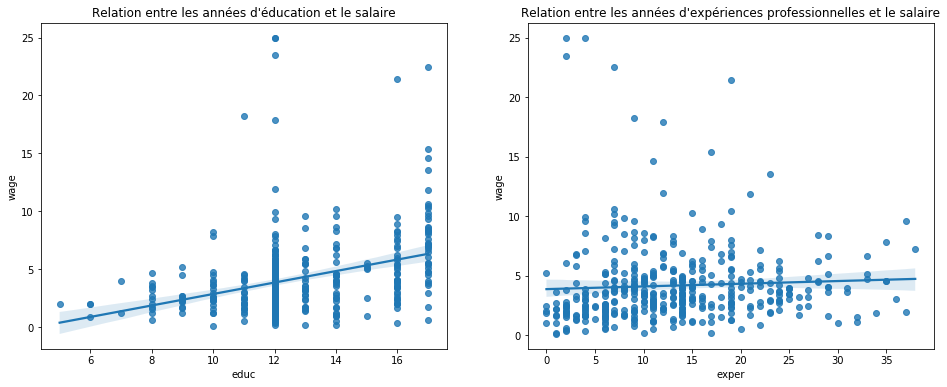

In [21]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 2, 1)
plt.title("Relation entre les années d'éducation et le salaire")
#plt.plot(df_filt.educ, df_filt.wage,'o')
sns.regplot(df_filt.educ, df_filt.wage, fit_reg=True)
ax = fig.add_subplot(1, 2, 2)

plt.title("Relation entre les années d'expériences professionnelles et le salaire")
sns.regplot(df_filt.exper, df_filt.wage, fit_reg=True)
plt.show()

#### Commentaire:  

On constate une légère augmentation du salaire en fonction des années d'études. A contrario, les années d'epériences professionnelles n'ont quasiment aucune influence sur les salaires. 

## Question 13
Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [22]:
# Modèle non contraint
df_work = df_filt.copy()
df_work['kids'] = df_work['kidsgt6'] + df_work['kidslt6']

Y = df_work['lwage']
X = df_work[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsgt6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_n = np.sum(ols.resid ** 2)
ddl_n = df_work.shape[0] - X.shape[1] - 1

# Modèle contraint
Y = df_work['lwage']
X = df_work[['city','educ','exper','nwifeinc', 'kids']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()
SSR_c = np.sum(ols.resid ** 2)
ddl_c = df_work.shape[0] - X.shape[1] - 1

# Stat de test
F = ((SSR_c - SSR_n)/ (ddl_c - ddl_n)) / (SSR_n / ddl_n)
p_val = 1- stats.f.cdf(F, ddl_c - ddl_n, ddl_n)

print(p_val)

0.7102679748433278


La p-value est de 0.71 et est supérieure à 5%. D'où on ne rejette pas l'hypothèse de non significacité.

## Question 14

Faire le test d'hétéroscédasticité de forme linéaire en donnant la p-valeur. Déterminer la ou
les sources d’hétéroscédasticité et corriger avec les méthodes vues en cours. Comparer les
écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

### Procédure:

On récupère les résidus u issus de l'estimation de l'équation suivante:

$  y = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$

On estime une nouvelle équation avec les résidus élevés au carré comme étant la variable expliquée

$  u² = \beta_{0}  + \beta_{1} city + \beta_{2} educ + \beta_{3} exper + \beta_{4} nwifeinc + \beta_{5} kidslt6 + \beta_{6} kidsge6$


### Test

$ H_0 : \beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = \beta_{5} = \beta_{6} = 0$ (Homoscédasticité)



In [23]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsgt6']
X = df_filt[cols]
Y = df_filt.lwage

model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
u = results.resid
y = u**2

model_ = sm.OLS(y, sm.add_constant(X))
results_ = model_.fit()
print(results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.009
Date:                Sun, 12 Apr 2020   Prob (F-statistic):             0.0633
Time:                        18:14:59   Log-Likelihood:                -622.39
No. Observations:                 428   AIC:                             1259.
Df Residuals:                     421   BIC:                             1287.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519      0.323      1.398      0.1

La statisque F est de 2.009 et la p valeur associée est 0.0633. Cette p-valeur est supérieure au seuil critique 0.05. On ne rejette pas l'hypothèse $\large H_0$. Donc il y a homoscédasticité. Mais d'après l'analyse graphique, la variable educ esquisse une tendance explosive avec le residu. Nous allons la transformer en log, corriger les écarts types selon la méthode vue en cours et refaire le test d'homoscédasticité.

In [24]:
df_filt['leduc'] = np.log(df_filt.educ)
cols = ['city', 'leduc', 'exper','nwifeinc', 'kidslt6', 'kidsgt6']
X = df_filt[cols]
Y = df_filt.lwage

h=np.sqrt(df_filt.leduc)
model = sm.WLS(Y, sm.add_constant(X),weight=1/h)
results = model.fit()
u = results.resid
y = u**2

model_ = sm.OLS(y, sm.add_constant(X))
results_ = model_.fit()

print(results.summary())
print(results_.summary())

                            WLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.147
Model:                            WLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     12.08
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.55e-12
Time:                        18:14:59   Log-Likelihood:                -434.12
No. Observations:                 428   AIC:                             882.2
Df Residuals:                     421   BIC:                             910.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0651      0.456     -4.527      0.0

Les écarts type ont bien changé dans les résultats du tableau 1. Dans les résultats du 1er tableau, la statistique de Fisher F est de 12.08 et la p valeur associée est de 1.55e-12. Ceci signifie que les coefficients sont globalement siginificatif.  Autrement dit, on rejette l'hypothèse H0 que tous les coefficients estimés sont statistiquement et conjointement nuls. Il y a donc bien des coefficients qui sont significatifs.

Dans les résultats du 2nd tableau où on estime le terme d'erreur u élevé au carré sur les autres variables explicatives, la statisque F est de 2.073 et la p valeur associée est 0.0552. Cette p valeur est supérieure au seuil critique 0.05. Donc on ne rejette pas l'hypothèse HO. il y a homoscedasticité. Globalement, tous les coefficients sont nuls c'est à dire qu'ils n'expliquent pas les résidus élevés au carré. On est donc dans un cas de figure d'absence d'hétéroscédasticité.

Notons que notre méthode a augmenté l'hétéroscédasticité par rapport au modèle précedement estimé car la p-valeur s'est améliorée.

## Question 15
Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans
et les autres : test sur l'ensemble des coefficients. Donnez les p-valeurs

In [25]:
# Modèle non-contraints
Y = df_filt['lwage'].copy()

X = df_filt[['city','educ','exper','nwifeinc', 'kidslt6', 'kidsgt6']]
ols = sm.OLS(Y, sm.add_constant(X)).fit()

SSR_n = np.sum(ols.resid ** 2)
ddl_n = X.shape[0] - X.shape[1] - 1

# Modèle contraint <43
Y = df_filt[(df_filt['age'] < 43)]['lwage']
X = df_filt[(df_filt['age'] < 43)][['city','educ','exper','nwifeinc', 'kidslt6', 'kidsgt6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()

SSR_c1 = np.sum(ols.resid ** 2)
ddl_c1 = X.shape[0] - X.shape[1] - 1

# Modèle contraint >43
Y = df_filt[(df_filt['age'] >= 43)]['lwage']
X = df_filt[(df_filt['age'] >= 43)][['city','educ','exper','nwifeinc', 'kidslt6', 'kidsgt6']]

ols = sm.OLS(Y, sm.add_constant(X)).fit()

SSR_c2 = np.sum(ols.resid ** 2)
ddl_c2 = X.shape[0] - X.shape[1] - 1

# Stat de test

F = ((SSR_n - (SSR_c1 + SSR_c2))/ (ddl_n - (ddl_c1 + ddl_c2))) / ((SSR_c1 + SSR_c2) / (ddl_c1 + ddl_c2))
p_val = 1 - stats.f.cdf(F, ddl_n - (ddl_c1 + ddl_c2), (ddl_c1 + ddl_c2))

print(p_val)

0.30997341357259567


### Commentaire:
Cette p valeur est supérieure au seuil de significativité de 5%. On ne rejette pas l'hypothèse H0. On conclut qu'il n'y a pas de changements structurels entre les groupes de femmes de plus de 43 ans et les autres.

## Question 16 :
Ajouter au modèle de la question 7 la variable huseduc. Faire ensuite la même régression en décomposant la variable huseduc en 4 variables binaires construites selon votre choix. Faire le test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs et commentez.

In [26]:
df_filt['dummy1'] = np.where(df_filt.huseduc < 7, 1, 0)
df_filt['dummy2'] = np.where(df_filt.huseduc.isin([7, 8, 9, 10]), 1, 0)
df_filt['dummy3'] = np.where(df_filt.huseduc.isin([11, 12, 13, 14]), 1, 0)
df_filt['dummy4'] = np.where(df_filt.huseduc.isin([15, 16, 17]), 1, 0)

cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsgt6','huseduc', 'dummy1', 'dummy2', 'dummy3', 'dummy4']
X = df_filt[cols]
Y = df_filt.lwage
model = sm.OLS(Y, sm.add_constant(X))
results = model.fit()
#print(results.summary())

u = results.resid
SSR = u.T@u
#print(SSR)

In [27]:
cols = ['city', 'educ', 'exper', 'nwifeinc', 'kidslt6', 'kidsgt6','huseduc']
X = df_filt[cols]
Y = df_filt.lwage
modelc = sm.OLS(Y, sm.add_constant(X))
results = modelc.fit()
#print(results.summary())

uc = results.resid
SSRc = uc.T@uc
#print(SSRc)
n = 428
k = 12
F=((SSRc-SSR)/4)/(SSR/(n-k))
print('La statistique du test de Fisher joint est:{}'.format(F))
pval = f.sf(F,4,n-k)
print('La p valeur associée à cette statistique est:{}'.format(pval))

La statistique du test de Fisher joint est:0.23859092428620082
La p valeur associée à cette statistique est:0.9164581525898713


La p-value > 0.05 donc les dummies introduits sont statistiquement et conjointement égale à 0.

# Partie 2 - Séries Temporelles

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

## Question 1

Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [29]:
df = pd.read_excel('quarterly.xls')
if df.isnull().values.any():
    print('Existence de valeur manquante dans le dataframe')
else:
    print('Pas de valeur manquante')

Pas de valeur manquante


Aucune valeur manquante dans le dataframe

## Question 2

Stationnariser la série de CPI en utilisant la méthode de régression qui inclut un terme de tendance dont la forme fonctionnelle est à choisir (linéaire, quadratique, log, exponentielle,…)

Text(0.5, 1.0, 'CPI')

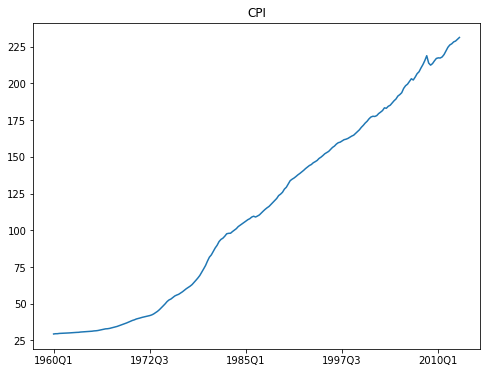

In [30]:
cpi = df['CPI']
date = df['DATE']
plt.figure(figsize=(8, 6))
ax = plt.subplot()
myLocator = mticker.AutoLocator()
ax.xaxis.set_major_locator(myLocator)
plt.plot(date, cpi)
plt.title('CPI')

La série n'est clairement pas stationnaire car on voit une tendance => la moyenne et la variance ne sont pas similaires en tout point

***** Méthode des différences finies *****

La tendance est linéaire, on peut donc appliquer la méthode des différences

Cette méthode des différences permet de supprimer la tendance temporelle

Text(0.5, 1.0, 'Stationarisation avec la méthode des différences')

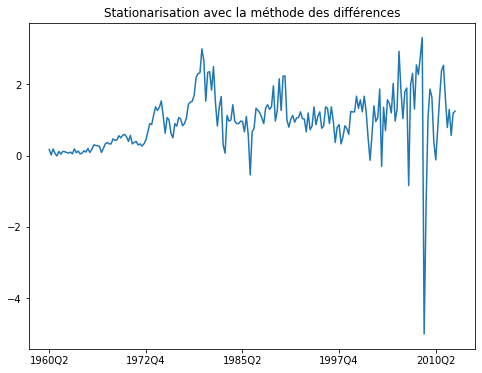

In [31]:
dcpi = np.diff(cpi)
plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.xaxis.set_major_locator(myLocator)
plt.plot(date[1:], dcpi)
plt.title('Stationarisation avec la méthode des différences')


***** Méthode de régression avec variable temporelle *****

Text(0.5, 1.0, 'Stationarisation avec la méthode de régression')

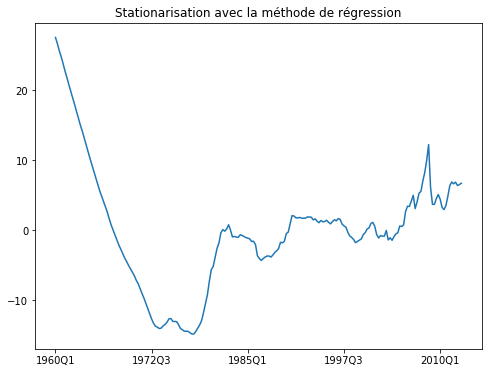

In [32]:
import statsmodels.api as sm

X = np.arange(len(cpi))+1 # variable de temps
X = sm.add_constant(X)
y = cpi
model=sm.OLS(y,X)
results = model.fit()
o1 = results.resid
plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.xaxis.set_major_locator(myLocator)
plt.plot(date,o1)
plt.title('Stationarisation avec la méthode de régression')

## Question 3

Stationnariser la série de CPI en utilisant un moyenne mobile centrée 5x5.

Text(0.5, 1.0, 'Stationarisation avec la méthode moyenne mobile 5x5')

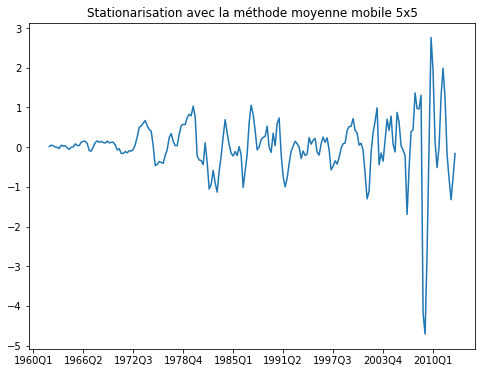

In [33]:
cpi_roll = cpi.rolling(window=5).mean()
cpi_mm = cpi - cpi_roll
cpi_roll_2 = cpi_mm.rolling(window=5).mean()
cpi_mm_2 = cpi_mm - cpi_roll_2


plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.xaxis.set_major_locator(myLocator)
plt.plot(date, cpi_mm_2)
plt.title('Stationarisation avec la méthode moyenne mobile 5x5')

De ces trois méthodes, on constate que c'est cette dernirère qui semble fournir de meilleurs résultats

## Question 4

Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

Text(0.5, 1.0, "Taux d'inflation (%)")

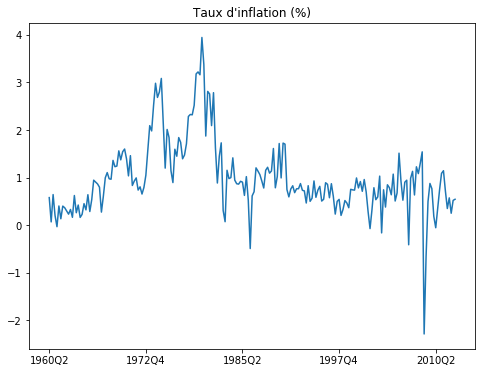

In [34]:
inf = cpi.pct_change() * 100
inf = inf.dropna()

plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.xaxis.set_major_locator(myLocator)
plt.plot(date[1:],inf)
plt.title("Taux d" + "'" + "inflation (%)")

On remarque des pics haussiers au moment des chocs pétroliers (1973-1979) et un pic baissier au moment de la crise des subprimes (2008).

## Question 5

Interpréter l'autocorrélogramme et l'autocorrélogramme partiel de inf. Quelle est la différence entre ces deux graphiques ?

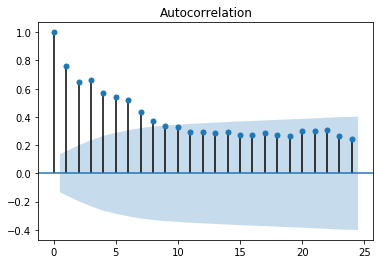

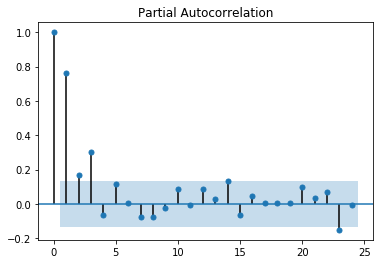

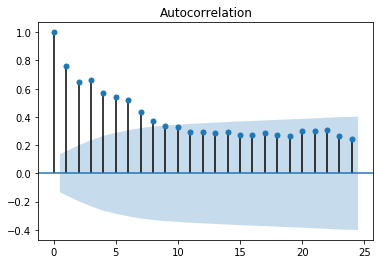

In [35]:
import statsmodels.graphics.tsaplots as tsap

tsap.plot_pacf(inf)
tsap.plot_acf(inf)

L'autocorrélogramme donne les corrélations entre X(t) et X(t-k)

L'autocorrélogramme partiel donne les corrélations entre les résidus des régressions de X(t) et X(t-k) avec X(t-1) ... X(t-k+1)

## Question 6

Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

Stationnarité: même moyenne et variance en tout point

<br>

Ergodicité: l'étude d'un processus peut se faire avec une seule trajectoire

Un autocorrélogramme décroissant est caractéristique d'un processus ergodique
car cela montre que la correlation est faible pour un grand nombre de périodes

<br>

Ergodicité => Stationnarité (attention réciproque fausse)

On a besoin que la série soit stationnaire pour avoir l'ergodicité

On a besoin de l'ergodicité pour pouvoir appliquer le théorème central limite.

L'ergodicité est aussi utile si on ne dispose que d'une seule variable -> on peut alors calculer l'autocorrelation sur cette variable à la place d'une correlation entre 2 variables.

<br>

"spurious relationships": correlations fautives entre 2 process

Un process X peut être très correlé avec un process Y cependant il peut ne pas y avoir de causalité entre les 2 process
=> la causalité vient d'une autre variable cachée

Pour détecter une régression fautive, il faut vérifier la stationarité du terme d'erreur ; intuitivement, s'il y a une tendance dans le terme d'erreur, c'est qu'on a mal expliqué la variable

## Question 7

Faire le test Augmented Dickey Fuller pour inf en utilisant le critère AIC pour déterminer le nombre de lags à inclure. Commenter

Text(0.5, 1.0, 'AIC')

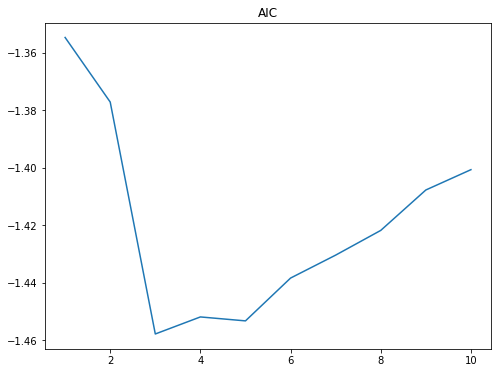

In [36]:
from statsmodels.tsa.ar_model import AutoReg

AIC=[]

for i in range(1,11):
    lags = np.arange(i)+1
    res = AutoReg(np.array(inf), lags = lags).fit()
    AIC.append(res.aic)

plt.figure(figsize=(8, 6))
plt.plot(range(1,11),AIC)
plt.title("AIC")

On voit que le modèle est plus fiable avec un nombre de lag égal à 3.

Le test ADF permet de vérifier l'existence d'une racine unitaire. Si elle existe,
alors le process n'est pas stationnaire.
H_0: présence d'une racine unitaire (<=> non stationnarité)

In [37]:
from statsmodels.tsa.stattools import adfuller

res_af = adfuller(inf, maxlag=3, autolag=None)
print('ADF p-valeur: {}'.format(res_af[1]))

ADF p-valeur: 0.028268921899213723


La p-valeur étant inférieure au seuil de 5%, on rejette H_0

On ne peut donc pas confirmer la présence d'une racine unitaire => la série est stationnaire

## Question 8

Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

In [38]:
from statsmodels.graphics.tsaplots import acf

print("l" + "'" + "autocorrélation à l'ordre 3 est {}".format(acf(inf)[3]))

l'autocorrélation à l'ordre 3 est 0.6586298757771514


## Question 9

Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.

In [39]:
import statsmodels.regression.linear_model as sm

unem = df['Unemp']
y_unem = unem[1:]
const_philips = np.ones(len(y_unem))
x_inf = np.column_stack((const_philips, inf))
model = sm.OLS(y_unem,x_inf)
results_philips = model.fit()
print(results_philips.summary())

                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.912
Time:                        18:15:01   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.0

La p-valeur associée à la variable x1 est élevée

=> on ne peut pas rejeter l'hypothèse de nullité du coefficient

=> la variable x1 n'est pas significative

## Question 10

Tester l’autocorrélation des erreurs.

Le test de l'autocorrélation des erreurs est un cas particulier d'un test d'hétéroscédasticité

H_0: il n'y a pas d'autocorrélation (homoscédasticité)

In [40]:
u = np.array(results_philips.resid)
y_res = np.array(u[1:])
const = np.ones(len(y_res))
x_res = np.column_stack((const, u[:len(u)-1]))
model = sm.OLS(y_res,x_res)
results_autocorr = model.fit()
print(results_autocorr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     4541.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          2.88e-143
Time:                        18:15:01   Log-Likelihood:                -70.272
No. Observations:                 210   AIC:                             144.5
Df Residuals:                     208   BIC:                             151.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.023      0.521      0.6

La p-valeur est inférieure à 5% => on peut rejeter l'hypothèse H_0

=> les erreurs sont bien autocorrélées

=> hétéroscédasticité

## Question 11

Corriger l’autocorrélation des erreurs par la méthode vue en cours.

In [41]:
def testHeteroscedasticite(x1,y):
    const = np.ones(len(y))
    x = np.column_stack((const, x1))

    model = sm.OLS(y,x)
    results = model.fit()

    u = np.array(results.resid)
    y_res = np.array(u[1:])
    const_res = np.ones(len(y_res))
    x_res = np.column_stack((const_res, u[:len(u)-1]))
    model = sm.OLS(y_res,x_res)
    results_heteroscedasticite = model.fit()

    return results_heteroscedasticite

***** Transformation 1 : passage au logarithme *****

In [42]:
log_inf = np.log(inf).fillna(-500)
print(testHeteroscedasticite(log_inf,y_unem).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     3395.
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          8.75e-131
Time:                        18:15:02   Log-Likelihood:                -98.303
No. Observations:                 210   AIC:                             200.6
Df Residuals:                     208   BIC:                             207.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.027      0.454      0.6

On ne peut toujours pas rejeter l'hypothèse d'homoscédasticité. Cependant on remarque que la F-stat diminue, on peut donc conclure que le test est moins significatif.

***** Transformation 2 : régressions par sous-groupes *****

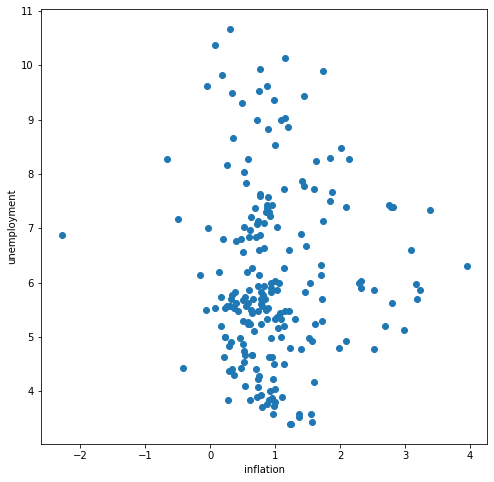

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     360.6
Date:                Sun, 12 Apr 2020   Prob (F-statistic):           1.54e-29
Time:                        18:15:02   Log-Likelihood:                -70.843
No. Observations:                  73   AIC:                             145.7
Df Residuals:                      71   BIC:                             150.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0671      0.076      0.885      0.3

In [43]:
fig = plt.figure(figsize=(8,8))
plt.scatter(inf,y_unem)
plt.ylabel("unemployment")
plt.xlabel("inflation")
plt.show()

indexes_group_1 = inf[inf >= 1].index
indexes_group_2 = inf[inf < 1].index

y_unem_1 = y_unem[indexes_group_1]
inf_1 = inf[indexes_group_1]
print(testHeteroscedasticite(inf_1,y_unem_1).summary())

y_unem_2 = y_unem[indexes_group_2]
inf_2 = inf[indexes_group_2]
print(testHeteroscedasticite(inf_2,y_unem_2).summary())

L'hétéroscédasticité est toujours significative, cependant avec cette dernière transformation on parvient à diminuer sensiblement la statistique de Fisher. Intuitivement, en séparant les variables en deux sous-groupes, on "casse" de la corrélation entre ces groupes.

## Question 12

Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

In [44]:
idx_mid = int(len(y_unem)/2)
idx_gpe_1 = inf[:idx_mid].index
idx_gpe_2 = inf[idx_mid:].index

y_phil_gpe_1 = y_unem[idx_gpe_1]
x_phil_gpe_1 = inf[idx_gpe_1]

y_phil_gpe_2 = y_unem[idx_gpe_2]
x_phil_gpe_2 = inf[idx_gpe_2]

const_phil_1 = np.ones(len(y_phil_gpe_1))
x_phil_1 = np.column_stack((const_phil_1, x_phil_gpe_1))
model = sm.OLS(y_phil_gpe_1,x_phil_1)
results_phil_1 = model.fit()
print(results_phil_1.summary())

const_phil_2 = np.ones(len(y_phil_gpe_2))
x_phil_2 = np.column_stack((const_phil_2, x_phil_gpe_2))
model = sm.OLS(y_phil_gpe_2,x_phil_2)
results_phil_2 = model.fit()
print(results_phil_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.402
Time:                        18:15:02   Log-Likelihood:                -204.20
No. Observations:                 105   AIC:                             412.4
Df Residuals:                     103   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9377      0.287     20.662      0.0

On remarque qu'en séparant l'échantillon à la moitié, on a une meilleure significativité de la relation chômage-inflation.

## Question 13

Faites les tests changement de structure de Chow et détecter le point de rupture.

In [45]:
from scipy.stats import f
u_phil = results_philips.resid
SSR = u_phil.T@u_phil
date_list = []

for i in range(20,len(inf)-10,5):
    idx_mid = i
    idx_gpe_1 = inf[:idx_mid].index
    idx_gpe_2 = inf[idx_mid:].index

    y_phil_gpe_1 = y_unem[idx_gpe_1]
    x_phil_gpe_1 = inf[idx_gpe_1]

    y_phil_gpe_2 = y_unem[idx_gpe_2]
    x_phil_gpe_2 = inf[idx_gpe_2]

    const_phil_1 = np.ones(len(y_phil_gpe_1))
    x_phil_1 = np.column_stack((const_phil_1, x_phil_gpe_1))
    model = sm.OLS(y_phil_gpe_1,x_phil_1)
    results_phil_1 = model.fit()
    u_phil_1 = results_phil_1.resid
    SSR1 = u_phil_1.T@u_phil_1

    const_phil_2 = np.ones(len(y_phil_gpe_2))
    x_phil_2 = np.column_stack((const_phil_2, x_phil_gpe_2))
    model = sm.OLS(y_phil_gpe_2,x_phil_2)
    results_phil_2 = model.fit()
    u_phil_2 = results_phil_2.resid
    SSR2 = u_phil_2.T@u_phil_2

    F=((SSR-(SSR1+SSR2))/(SSR1+SSR2))*(len(y_unem)-2*2)/2
    pval = f.sf(F,len(y_unem)-2*2,2)
    if(pval < 0.05):
        date_split = date[idx_mid]
        date_list.append(date_split)
        print('date:{} pval:{}'.format(date_split, pval))

date:1970Q1 pval:0.03603611408445894
date:1971Q2 pval:0.03871136583358301
date:1972Q3 pval:0.0402855006605979
date:1973Q4 pval:0.038372192644781006
date:1975Q1 pval:0.046620849177862814
date:2007Q3 pval:0.03741300566572905
date:2008Q4 pval:0.025272725981710892


Text(0.5, 1.0, "Taux d'inflation (%) et changement de structure")

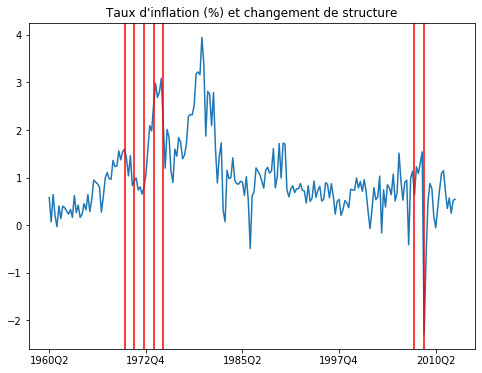

In [46]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.xaxis.set_major_locator(myLocator)
plt.plot(date[1:],inf)
for d in date_list:
    plt.axvline(d, c='red')
plt.title("Taux d" + "'" + "inflation (%) et changement de structure")

On remarque que les différents points de ruptures se situent juste avant un pic haussier ou baissier (chocs pétrioliers et crise financière).

## Question 14

Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

In [47]:
# Modèle non contraint
inf_lag_4 = inf[:len(inf)-4]
inf_lag_3 = inf[1:len(inf)-3]
inf_lag_2 = inf[2:len(inf)-2]
inf_lag_1 = inf[3:len(inf)-1]
inf_lag_0 = inf[4:]
y_unem_lag = y_unem[4:]
const_philips_2 = np.ones(len(y_unem_lag))
x_philips_nc = np.column_stack((const_philips_2, inf_lag_0, inf_lag_1, inf_lag_2, inf_lag_3, inf_lag_4))
model = sm.OLS(y_unem_lag,x_philips_nc)
results_philips_nc = model.fit()
u_philips_nc = results_philips_nc.resid
SSR_NC = u_philips_nc.T@u_philips_nc

# Modèle contraint
x_philips_c = np.column_stack((const_philips_2, inf_lag_0))
model = sm.OLS(y_unem_lag,x_philips_c)
results_philips_c = model.fit()
u_philips_c = results_philips_c.resid
SSR_C = u_philips_c.T@u_philips_c

# Calcul de la p-valeur
n = len(y_unem_lag)
F = ((SSR_C-SSR_NC)/(6-2))/(SSR_NC/(n-6))
print("p-valeur pour test de Granger: {}".format(f.sf(F,6-2,n-6)))

p-valeur pour test de Granger: 0.00019138342876880087


La p-valeur étant très faible, on peut rejeter H_0 sans risque.

Les délais 1, 2, 3 et 4 ont bien un pouvoir prédictif.

## Question 15

Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

Text(0.5, 1.0, 'Délais distribués')

<Figure size 576x576 with 0 Axes>

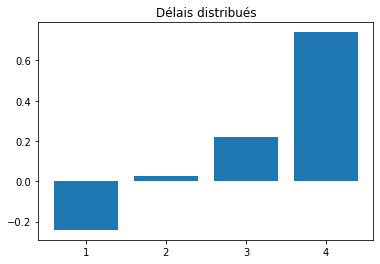

In [48]:
fig = plt.figure(figsize=(8,8))
ax = plt.figure().gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.bar((1,2,3,4),results_philips_nc.params[2:])
plt.title("Délais distribués")

On voit que le délai 4 impacte le plus le chômage.

In [49]:
print("impact de long terme : {}".format(sum(results_philips_nc.params[2:])))

impact de long terme : 0.7435922863350407
